# Pandas

`Pandas` to kolejna biblioteka niezbędna do analizy danych w Pythonie. Dostarcza wydajne struktury danych, dzięki którym praca z danymi tabularycznymi staje się prosta i ituicyjna. Celem twórców jest utrzymanie statusu biblioteki niezbędnej do codziennych analiz oraz zdobycie fotela lidera w kategorii najpotężniejszego narzędzia open-source do analizy danych w jakimkolwiek języku programowania. Obecnie, projekt wciąż prężnie się rozwija i jego znajomość jest niezbędna dla każdego danologa.

`Pandas` będzie dobrym wyborem do następujących zastosowań:
* Dane tabularyczne (kolumny jak w SQLu lub Excelu)
* Dane reprezentujące szeregi czasowe
* Macierze,
* Wyniki pomiarów i statystyk.

Dwa główne typy danych w Pythonie to `Series` (jednowymiarowa kolumna) i `DataFrame` (dwuwymiarowa tabela). `Pandas` wykorzystuje w obliczeniach bibliotekę `NumPy` oraz jest przygotowany do integrowania się z wieloma bibliotekami zewnętrznymi.

Mocnymi stronami `Pandas` są między innymi:
* Prosta obsługa brakujących wartości (`NaN`),
* Możliwość modyfikowania rozmiaru `DataFrame`'a - możemy dodawać i usuwać kolumny i wiersze,
* Automatyczne wyrównywanie danych w obliczeniach (jak w `NumPy`),
* Metoda `groupBy` działająca analogicznie jak w SQLu,
* Łatwo stworzyć `DataFrame` na podstawie innego obiektu,
* Cięcie, indeksowanie i tworzenie podzbiorów,
* Łączenie (`join` i `merge`) zbiorów.


***
# pandas w pigułce

In [0]:
import numpy as np
import pandas as pd

pd.__version__

'0.24.2'

In [0]:
s = pd.Series([1,3,4,np.nan, 6, 8])
print(s)
dates = pd.date_range('20130101', periods=6)
print(dates)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2.dtypes

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01  1.792069  0.307646  0.172692  0.185389
2013-01-02  0.731386  0.364902 -2.052498  0.361227
2013-01-03  1.088408  1.991590 -1.666381  0.061388
2013-01-04  0.391558  0.719236 -2.826221 -0.047850
2013-01-05  1.283375  0.583784 -1.436622  0.729598
2013-01-06 -1.620769  0.363853 -0.753039  1.626662


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Przeglądanie danych
Do przeglądania `DataFrame` służą między innymi następujące pola i metody.

In [0]:
from IPython.display import display

display(df.head())
display(df.tail(3))

print(df.index)
print(df.columns)

,A,B,C,D
2013-01-01,1.792069,0.307646,0.172692,0.185389
2013-01-02,0.731386,0.364902,-2.052498,0.361227
2013-01-03,1.088408,1.991590,-1.666381,0.061388
2013-01-04,0.391558,0.719236,-2.826221,-0.047850
2013-01-05,1.283375,0.583784,-1.436622,0.729598


,A,B,C,D
2013-01-04,0.391558,0.719236,-2.826221,-0.047850
2013-01-05,1.283375,0.583784,-1.436622,0.729598
2013-01-06,-1.620769,0.363853,-0.753039,1.626662


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


## DataFrame.to_numpy()
`DataFrame.to_numpy()` jest metodą, która zamienia `DataFrame` na tablicę. Problemem jest to, że o ile `DataFrame` może przechowywać dane różnego typu, o tyle `ndarray` ma jeden `dtype` na całą tablicę. W związku z tym, może się okazać, że zajdzie konieczność castowania wszystkich obiektów na `object`.

`df.to_numpy()` będzie operacją błyskawiczną, natomiast `df2.to_numpy()` będzie już relatywnie wolne.

In [0]:
%timeit df.to_numpy()
%timeit df2.to_numpy()

The slowest run took 11.53 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.68 µs per loop
10000 loops, best of 3: 161 µs per loop


Dostępnych jest również trochę funkcji użytkowych (util).

In [0]:
print(df.info())  # informacje o DF
print('----')
display(df.describe())  # opis statystyczny
print('----')
display(df.T)  # zamiana wierszy z kolumnami
print('----')
display(df.sort_index(axis=1, ascending=False))  # sortowanie wg indeksu
print('----')
display(df.sort_values(by='B'))  # sortowanie według kolumny

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes
None
----


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.611005,0.721835,-1.427012,0.486069
std,1.193178,0.641630,1.041124,0.621559
min,-1.620769,0.307646,-2.826221,-0.047850
25%,0.476515,0.364115,-1.955969,0.092388
50%,0.909897,0.474343,-1.551502,0.273308
75%,1.234633,0.685373,-0.923935,0.637505
max,1.792069,1.991590,0.172692,1.626662


----


,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.792069,0.731386,1.088408,0.391558,1.283375,-1.620769
B,0.307646,0.364902,1.991590,0.719236,0.583784,0.363853
C,0.172692,-2.052498,-1.666381,-2.826221,-1.436622,-0.753039
D,0.185389,0.361227,0.061388,-0.047850,0.729598,1.626662


----


,D,C,B,A
2013-01-01,0.185389,0.172692,0.307646,1.792069
2013-01-02,0.361227,-2.052498,0.364902,0.731386
2013-01-03,0.061388,-1.666381,1.991590,1.088408
2013-01-04,-0.047850,-2.826221,0.719236,0.391558
2013-01-05,0.729598,-1.436622,0.583784,1.283375
2013-01-06,1.626662,-0.753039,0.363853,-1.620769


----


,A,B,C,D
2013-01-01,1.792069,0.307646,0.172692,0.185389
2013-01-06,-1.620769,0.363853,-0.753039,1.626662
2013-01-02,0.731386,0.364902,-2.052498,0.361227
2013-01-05,1.283375,0.583784,-1.436622,0.729598
2013-01-04,0.391558,0.719236,-2.826221,-0.047850
2013-01-03,1.088408,1.991590,-1.666381,0.061388


## Pobieranie danych (select)

In [0]:
print(df['A']) # tylko kolumna A
print('----')
display(df[0:3]) # wiersze od 0 do 2
print('----')
display(df['20130102':'20130104'])  # od 2 do 3 stycznia
print('----')
print(df.loc[dates[0]])  # według wartości w indeksie
print('----')
display(df.loc[:, ['A', 'B']])  # wszystkie wiersze, ale tylko kolumny A i B
print('----')
display(df.loc['20130102':'20130104', ['A', 'B']])  # zakres wierszy
print('----')
print(df.loc['20130102', ['A', 'B']])  # tylko jeden wiersz
print('----')
print(df.loc[dates[0], 'A'])  # jedna komórka
print('----')
print(df.at[dates[0], 'A'])  # jedna komórka
print('----')
display(df.iloc[[3]])  # jeden wiersz, wg numeru wiersza jako DF
display(df.iloc[3])  # jako Series
print('----')
display(df.iloc[3:5, 0:2])  # według indeksów
print('----')
display(df[df.A < 0])  # indeksowanie warunkiem logicznym
print('----')
display(df[df > 0])  # szuka wartości mniejszych od zero

2013-01-01    1.792069
2013-01-02    0.731386
2013-01-03    1.088408
2013-01-04    0.391558
2013-01-05    1.283375
2013-01-06   -1.620769
Freq: D, Name: A, dtype: float64
----


,A,B,C,D
2013-01-01,1.792069,0.307646,0.172692,0.185389
2013-01-02,0.731386,0.364902,-2.052498,0.361227
2013-01-03,1.088408,1.991590,-1.666381,0.061388


----


,A,B,C,D
2013-01-02,0.731386,0.364902,-2.052498,0.361227
2013-01-03,1.088408,1.991590,-1.666381,0.061388
2013-01-04,0.391558,0.719236,-2.826221,-0.047850


----
A    1.792069
B    0.307646
C    0.172692
D    0.185389
Name: 2013-01-01 00:00:00, dtype: float64
----


,A,B
2013-01-01,1.792069,0.307646
2013-01-02,0.731386,0.364902
2013-01-03,1.088408,1.991590
2013-01-04,0.391558,0.719236
2013-01-05,1.283375,0.583784
2013-01-06,-1.620769,0.363853


----


,A,B
2013-01-02,0.731386,0.364902
2013-01-03,1.088408,1.991590
2013-01-04,0.391558,0.719236


----
A    0.731386
B    0.364902
Name: 2013-01-02 00:00:00, dtype: float64
----
1.7920690748099706
----
1.7920690748099706
----


,A,B,C,D
2013-01-04,0.391558,0.719236,-2.826221,-0.04785


A    0.391558
B    0.719236
C   -2.826221
D   -0.047850
Name: 2013-01-04 00:00:00, dtype: float64

----


,A,B
2013-01-04,0.391558,0.719236
2013-01-05,1.283375,0.583784


----


,A,B,C,D
2013-01-06,-1.620769,0.363853,-0.753039,1.626662


----


,A,B,C,D
2013-01-01,1.792069,0.307646,0.172692,0.185389
2013-01-02,0.731386,0.364902,NaN,0.361227
2013-01-03,1.088408,1.991590,NaN,0.061388
2013-01-04,0.391558,0.719236,NaN,NaN
2013-01-05,1.283375,0.583784,NaN,0.729598
2013-01-06,NaN,0.363853,NaN,1.626662


In [0]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
display(df2[df2['E'].isin(['two', 'four'])])  # wybór według wartości w komórkach

,A,B,C,D,E
2013-01-03,1.088408,1.991590,-1.666381,0.061388,two
2013-01-05,1.283375,0.583784,-1.436622,0.729598,four


In [0]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
df['F'] = s1  # dodanie Series jako nowy wiersz
display(df)
print('----')

df.loc[:, 'D'] = np.array([5] * len(df))  # przypisanie numpy array
display(df)
print('----')

df[df > 0] = -df  # przypisanie ujemnych wartości tam gdzie są dodatnie
display(df)

,A,B,C,D,F
2013-01-01,1.792069,0.307646,0.172692,0.185389,NaN
2013-01-02,0.731386,0.364902,-2.052498,0.361227,1.0
2013-01-03,1.088408,1.991590,-1.666381,0.061388,2.0
2013-01-04,0.391558,0.719236,-2.826221,-0.047850,3.0
2013-01-05,1.283375,0.583784,-1.436622,0.729598,4.0
2013-01-06,-1.620769,0.363853,-0.753039,1.626662,5.0


----


,A,B,C,D,F
2013-01-01,1.792069,0.307646,0.172692,5,NaN
2013-01-02,0.731386,0.364902,-2.052498,5,1.0
2013-01-03,1.088408,1.991590,-1.666381,5,2.0
2013-01-04,0.391558,0.719236,-2.826221,5,3.0
2013-01-05,1.283375,0.583784,-1.436622,5,4.0
2013-01-06,-1.620769,0.363853,-0.753039,5,5.0


----


,A,B,C,D,F
2013-01-01,-1.792069,-0.307646,-0.172692,-5,NaN
2013-01-02,-0.731386,-0.364902,-2.052498,-5,-1.0
2013-01-03,-1.088408,-1.991590,-1.666381,-5,-2.0
2013-01-04,-0.391558,-0.719236,-2.826221,-5,-3.0
2013-01-05,-1.283375,-0.583784,-1.436622,-5,-4.0
2013-01-06,-1.620769,-0.363853,-0.753039,-5,-5.0


## Praca z brakującymi danymi

In [0]:
display(df)
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])  # wybierz nowy zakres indeksów z DF
display(df1)
df1.loc[dates[0]:dates[1], 'E'] = 1  # ustaw wartość w kolumnie E, w odpowiednich wierszach
display(df1)
df2 = df1.copy()

display(pd.isna(df1))  # sprawdź czy wartości są nan - do indeksowania warunkiem logicznym

display(df1.dropna(how='any'))  # usuń gdy nan jest gdziekolwiek; 'all' gdy tylko we wszystkich kolumnach
display(df2.fillna(value=5))  # wypełnij wartością value


,A,B,C,D,F
2013-01-01,-1.792069,-0.307646,-0.172692,-5,NaN
2013-01-02,-0.731386,-0.364902,-2.052498,-5,-1.0
2013-01-03,-1.088408,-1.991590,-1.666381,-5,-2.0
2013-01-04,-0.391558,-0.719236,-2.826221,-5,-3.0
2013-01-05,-1.283375,-0.583784,-1.436622,-5,-4.0
2013-01-06,-1.620769,-0.363853,-0.753039,-5,-5.0


,A,B,C,D,F,E
2013-01-01,-1.792069,-0.307646,-0.172692,-5,NaN,NaN
2013-01-02,-0.731386,-0.364902,-2.052498,-5,-1.0,NaN
2013-01-03,-1.088408,-1.991590,-1.666381,-5,-2.0,NaN
2013-01-04,-0.391558,-0.719236,-2.826221,-5,-3.0,NaN


,A,B,C,D,F,E
2013-01-01,-1.792069,-0.307646,-0.172692,-5,NaN,1.0
2013-01-02,-0.731386,-0.364902,-2.052498,-5,-1.0,1.0
2013-01-03,-1.088408,-1.991590,-1.666381,-5,-2.0,NaN
2013-01-04,-0.391558,-0.719236,-2.826221,-5,-3.0,NaN


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


,A,B,C,D,F,E
2013-01-02,-0.731386,-0.364902,-2.052498,-5,-1.0,1.0


,A,B,C,D,F,E
2013-01-01,-1.792069,-0.307646,-0.172692,-5,5.0,1.0
2013-01-02,-0.731386,-0.364902,-2.052498,-5,-1.0,1.0
2013-01-03,-1.088408,-1.991590,-1.666381,-5,-2.0,5.0
2013-01-04,-0.391558,-0.719236,-2.826221,-5,-3.0,5.0


## Operacje

In [0]:
print(df.mean())  # domyślnie - dla kolumn
print('----')
print(df.mean(axis=1))  # dla wierszy
print('----')
display(df.apply(np.cumsum))
print('----')
print(df.apply(lambda x: x.max() - x.min()))

A   -1.151261
B   -0.721835
C   -1.484576
D   -5.000000
F   -3.000000
dtype: float64
----
2013-01-01   -1.818102
2013-01-02   -1.829757
2013-01-03   -2.349276
2013-01-04   -2.387403
2013-01-05   -2.460756
2013-01-06   -2.547532
Freq: D, dtype: float64
----


,A,B,C,D,F
2013-01-01,-1.792069,-0.307646,-0.172692,-5,NaN
2013-01-02,-2.523455,-0.672549,-2.225190,-10,-1.0
2013-01-03,-3.611864,-2.664139,-3.891571,-15,-3.0
2013-01-04,-4.003422,-3.383375,-6.717792,-20,-6.0
2013-01-05,-5.286797,-3.967158,-8.154414,-25,-10.0
2013-01-06,-6.907566,-4.331011,-8.907454,-30,-15.0


----
A    1.400511
B    1.683944
C    2.653529
D    0.000000
F    4.000000
dtype: float64


## Łączenie i grupowanie DataFrame

In [0]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]  # podział wg wierszy
print(pieces)
display(pd.concat(pieces))  # konkatenacja
print('----')

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
display(left)
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]}) 
display(right)
merged = pd.merge(left, right, on='key')  # łączenie wg wspólnej kolumny
display(merged)
print('----')

df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
print(s)
df.append(s, ignore_index=True)  # dodaj wiersz, ignorując indeks
display(df)
print('----')


df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

display(df.groupby('A').sum())

display(df.groupby(['A', 'B']).sum())

[          0         1         2         3
0  0.108369  0.738672 -0.552083 -1.568889
1 -0.610860  1.467419  0.398033 -0.253552
2 -1.520582  0.923287 -0.846596  0.111136,           0         1         2         3
3 -0.935489 -0.873299 -1.058455  0.007255
4  0.686140 -1.600466  1.202888  0.521346
5  1.706467  0.766146  0.312231  0.515896
6  0.832126 -0.254166  0.520120  0.343816,           0         1         2         3
7  0.673635  1.518213  0.691042 -0.443615
8 -0.425953 -1.420517 -0.424823  0.936910
9  0.032324  0.477488  0.518718 -0.581261]


,0,1,2,3
0,0.108369,0.738672,-0.552083,-1.568889
1,-0.610860,1.467419,0.398033,-0.253552
2,-1.520582,0.923287,-0.846596,0.111136
3,-0.935489,-0.873299,-1.058455,0.007255
4,0.686140,-1.600466,1.202888,0.521346
5,1.706467,0.766146,0.312231,0.515896
6,0.832126,-0.254166,0.520120,0.343816
7,0.673635,1.518213,0.691042,-0.443615
8,-0.425953,-1.420517,-0.424823,0.936910
9,0.032324,0.477488,0.518718,-0.581261


----


,key,lval
0,foo,1
1,foo,2


,key,rval
0,foo,4
1,foo,5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


----
A   -1.839312
B   -1.500881
C    1.155619
D    0.502406
Name: 3, dtype: float64


,A,B,C,D
0,0.453823,-0.618671,0.316814,-0.117888
1,0.569033,1.091322,0.321755,-0.649961
2,-1.585350,-1.211529,-0.680419,1.757291
3,-1.839312,-1.500881,1.155619,0.502406
4,-1.103524,-0.207871,0.664558,0.711869
5,-1.091580,0.547023,0.520066,1.230588
6,0.004026,0.540195,-1.434592,0.220949
7,-0.172797,1.003543,-0.479314,-0.399375


----


,C,D
A,,
bar,0.157986,-1.572655
foo,3.009648,-2.221564


C         D
A   B                        
bar one    1.622211 -0.414930
    three -0.470598 -1.864755
    two   -0.993626  0.707029
foo one    2.782225  0.535025
    three -0.142871 -0.151538
    two    0.370293 -2.605051

## Cechy kategoryczne

In [0]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
display(df)
print('----')
df["grade"] = df["raw_grade"].astype("category")  # konwersja do typu kategorii
display(df)
print('----')

df["grade"].cat.categories = ["very good", "good", "very bad"]  # ustawienie kategorii
display(df)
print('----')

display(df.sort_values(by="grade")) # sortowanie według zmiennej kategorycznej
print('----')
display(df.groupby("grade").size()) # grupowanie według wartości zmiennej kategorycznej

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


----


,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


----


,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


----


,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


----


grade
very good    3
good         2
very bad     1
dtype: int64

## Wizualizacje

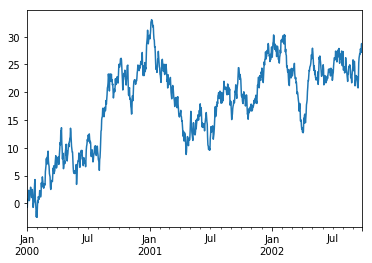

In [0]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()  # zwykły wykres

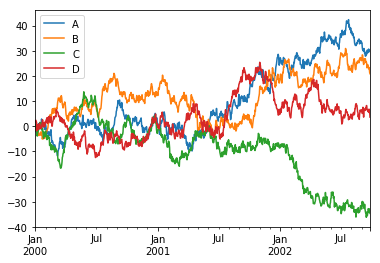

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()  #dla wielu wymiarów

## Wczytywanie `DataFrame` z pliku i zapis do pliku

In [0]:
df.to_csv('foo.csv')  # zapis do pliku

pd.read_csv('foo.csv')  # wczytywanie pliku
df.to_excel('foo.xlsx', sheet_name='Sheet1')  # zapis do formatu Excela

# Tutorial

In [0]:
!git clone https://github.com/PiotrJZielinski/ml-throwdown-datasets

Cloning into 'ml-throwdown-datasets'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 40 (delta 7), reused 21 (delta 4), pack-reused 16
Unpacking objects: 100% (40/40), done.


**1. Najpierw importujemy niezbędne biblioteki**

In [0]:
import numpy as np
import pandas as pd  # konwencja

W pandasie mamy do czynienia z dwoma typami struktur: Series i Dataframes

**Series** to jednowymiarowa struktura danych (jednowymiarowa macierz numpy), która oprócz danych przechowuje też unikalny indeks. Taką serię możemy utworzyć następująco:

In [0]:
pd.Series(np.random.random(10))

0    0.661750
1    0.072319
2    0.758071
3    0.035651
4    0.992312
5    0.488344
6    0.083446
7    0.319852
8    0.419058
9    0.310146
dtype: float64

Drugą strukturą w pandas jest **DataFrame** - czyli dwu lub więcej wymiarowa struktura danych, najczęściej w formie tabeli z wierszami i kolumnami. Kolumny mają nazwy, a wiersze mają indeksy.

W tym szkoleniu skupimy się właśnie na DataFramach.

**2. Pierwszy krok jest zwykle ten sam. Dane są przechowywane w plikach csv, tsv, bazach danych, plikach excel itd. Wczytać je można np. z użyciem funkcji `pd.read_csv`**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [0]:
from IPython.display import display

# plik tsv - rozdzielony tabulatorami
chipotle = pd.read_csv('ml-throwdown-datasets/chipotle.tsv', sep='\t')
# interesujące parametry: delimiter lub sep (alias), header (czy zawiera linię z opisem kolumn)
# names (lista kolumn), index_col (wybiera daną kolumnę jako indeks)
# usecols (wykorzystuje tylko określone kolumny)
display(chipotle)  # wyświetlamy - macierz z danymi różnych typów
display(chipotle.head())
display(chipotle.tail(3))
display(chipotle.sample(5))

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


,order_id,quantity,item_name,choice_description,item_price
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


,order_id,quantity,item_name,choice_description,item_price
3796,1520,1,Steak Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Pinto Beans,...",$9.25
2410,955,1,Bottled Water,NaN,$1.09
3049,1214,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",$11.25
1983,801,1,Canned Soft Drink,[Diet Coke],$1.25
2467,979,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Pinto Beans,...",$9.25


Wczytamy teraz dataset `read_from`

In [0]:
read = pd.read_csv('ml-throwdown-datasets/read_from.csv', sep=';',
                  names=['time', 'status', 'country', 'identifier', 'how', 'continent'],
                  parse_dates=True, index_col='time')

display(read.sample(5))

,status,country,identifier,how,continent
time,,,,,
2018-01-01 06:05:22,read,country_2,2458151709,Reddit,Africa
2018-01-01 23:13:57,read,country_1,2458152983,AdWords,Europe
2018-01-01 14:50:19,read,country_7,2458152365,Reddit,Europe
2018-01-01 06:10:13,read,country_7,2458151721,Reddit,South America
2018-01-01 04:42:10,read,country_4,2458151614,SEO,South America


In [0]:
# można też ręcznie utworzyć dataframe - słownik
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

In [0]:
#broadcast

cities = ['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']

# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

In [0]:
display(read[['country', 'how']])  # wybór wielu kolumn
display(read[['continent']])  # dataframe
display(read['continent'])  # Series
display(read.continent)  # Series

,country,how
time,,
2018-01-01 00:01:01,country_7,SEO
2018-01-01 00:03:20,country_7,SEO
2018-01-01 00:04:01,country_7,AdWords
2018-01-01 00:04:02,country_7,AdWords
2018-01-01 00:05:03,country_8,Reddit
2018-01-01 00:05:42,country_6,Reddit
2018-01-01 00:06:06,country_2,Reddit
2018-01-01 00:06:15,country_6,AdWords
2018-01-01 00:07:21,country_7,AdWords


,continent
time,
2018-01-01 00:01:01,North America
2018-01-01 00:03:20,South America
2018-01-01 00:04:01,Africa
2018-01-01 00:04:02,Europe
2018-01-01 00:05:03,North America
2018-01-01 00:05:42,North America
2018-01-01 00:06:06,Europe
2018-01-01 00:06:15,Europe
2018-01-01 00:07:21,North America


time
2018-01-01 00:01:01    North America
2018-01-01 00:03:20    South America
2018-01-01 00:04:01           Africa
2018-01-01 00:04:02           Europe
2018-01-01 00:05:03    North America
2018-01-01 00:05:42    North America
2018-01-01 00:06:06           Europe
2018-01-01 00:06:15           Europe
2018-01-01 00:07:21    North America
2018-01-01 00:07:29    North America
2018-01-01 00:07:57             Asia
2018-01-01 00:08:57        Australia
2018-01-01 00:09:11             Asia
2018-01-01 00:09:29           Europe
2018-01-01 00:11:06           Africa
2018-01-01 00:11:22    North America
2018-01-01 00:13:05    North America
2018-01-01 00:13:06             Asia
2018-01-01 00:13:39    North America
2018-01-01 00:14:53             Asia
2018-01-01 00:15:44             Asia
2018-01-01 00:15:50           Africa
2018-01-01 00:17:15           Europe
2018-01-01 00:17:31             Asia
2018-01-01 00:17:58           Africa
2018-01-01 00:18:55    North America
2018-01-01 00:20:18    North Amer

time
2018-01-01 00:01:01    North America
2018-01-01 00:03:20    South America
2018-01-01 00:04:01           Africa
2018-01-01 00:04:02           Europe
2018-01-01 00:05:03    North America
2018-01-01 00:05:42    North America
2018-01-01 00:06:06           Europe
2018-01-01 00:06:15           Europe
2018-01-01 00:07:21    North America
2018-01-01 00:07:29    North America
2018-01-01 00:07:57             Asia
2018-01-01 00:08:57        Australia
2018-01-01 00:09:11             Asia
2018-01-01 00:09:29           Europe
2018-01-01 00:11:06           Africa
2018-01-01 00:11:22    North America
2018-01-01 00:13:05    North America
2018-01-01 00:13:06             Asia
2018-01-01 00:13:39    North America
2018-01-01 00:14:53             Asia
2018-01-01 00:15:44             Asia
2018-01-01 00:15:50           Africa
2018-01-01 00:17:15           Europe
2018-01-01 00:17:31             Asia
2018-01-01 00:17:58           Africa
2018-01-01 00:18:55    North America
2018-01-01 00:20:18    North Amer

W pandasie istnieją co najmniej 4 metody pobierania danych. Pierwsza z nich to zwykłe nawiasy kwadratowe (jak wyżej). Można również w nawiasach podawać warunek logiczny.

In [0]:
print(read.how == 'SEO')  # Series z wartościami True/False według wierszy
display(read[read.how == 'SEO'])  # Wyświetla wszystkie wiersze dla których było True


time
2018-01-01 00:01:01     True
2018-01-01 00:03:20     True
2018-01-01 00:04:01    False
2018-01-01 00:04:02    False
2018-01-01 00:05:03    False
2018-01-01 00:05:42    False
2018-01-01 00:06:06    False
2018-01-01 00:06:15    False
2018-01-01 00:07:21    False
2018-01-01 00:07:29    False
2018-01-01 00:07:57    False
2018-01-01 00:08:57     True
2018-01-01 00:09:11    False
2018-01-01 00:09:29    False
2018-01-01 00:11:06    False
2018-01-01 00:11:22     True
2018-01-01 00:13:05     True
2018-01-01 00:13:06    False
2018-01-01 00:13:39     True
2018-01-01 00:14:53    False
2018-01-01 00:15:44    False
2018-01-01 00:15:50    False
2018-01-01 00:17:15    False
2018-01-01 00:17:31    False
2018-01-01 00:17:58    False
2018-01-01 00:18:55    False
2018-01-01 00:20:18     True
2018-01-01 00:20:44     True
2018-01-01 00:23:16    False
2018-01-01 00:23:51    False
                       ...  
2018-01-01 23:41:11    False
2018-01-01 23:41:51    False
2018-01-01 23:43:54    False
2018-01-0

,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2018-01-01 00:08:57,read,country_7,2458151272,SEO,Australia
2018-01-01 00:11:22,read,country_7,2458151276,SEO,North America
2018-01-01 00:13:05,read,country_8,2458151277,SEO,North America
2018-01-01 00:13:39,read,country_4,2458151279,SEO,North America
2018-01-01 00:20:18,read,country_5,2458151287,SEO,North America
2018-01-01 00:20:44,read,country_2,2458151288,SEO,North America
2018-01-01 00:24:52,read,country_6,2458151291,SEO,North America


Teoretycznie, wiele operacji można wykonywać sekwencyjnie, gdyż większość z nich zwraca wynikową DataFrame.

In [0]:
read.head()[['country', 'identifier']]

,country,identifier
time,,
2018-01-01 00:01:01,country_7,2458151261
2018-01-01 00:03:20,country_7,2458151262
2018-01-01 00:04:01,country_7,2458151263
2018-01-01 00:04:02,country_7,2458151264
2018-01-01 00:05:03,country_8,2458151265


Możemy też wyświetlić indeks i listę kolumn

In [0]:
print(read.columns)
print(read.index)

Index(['status', 'country', 'identifier', 'how', 'continent'], dtype='object')
DatetimeIndex(['2018-01-01 00:01:01', '2018-01-01 00:03:20',
               '2018-01-01 00:04:01', '2018-01-01 00:04:02',
               '2018-01-01 00:05:03', '2018-01-01 00:05:42',
               '2018-01-01 00:06:06', '2018-01-01 00:06:15',
               '2018-01-01 00:07:21', '2018-01-01 00:07:29',
               ...
               '2018-01-01 23:54:26', '2018-01-01 23:54:39',
               '2018-01-01 23:54:45', '2018-01-01 23:55:04',
               '2018-01-01 23:56:42', '2018-01-01 23:57:14',
               '2018-01-01 23:58:33', '2018-01-01 23:59:36',
               '2018-01-01 23:59:36', '2018-01-01 23:59:38'],
              dtype='datetime64[ns]', name='time', length=1795, freq=None)


#Tutaj 01_2

Różne metody wyboru elementów 

In [0]:
dates = read.index
print(read['identifier']) # tylko kolumna A
print('----')
display(read[0:3]) # wiersze od 0 do 2
print('----')
display(read['2018-01-01 12:00':'2018-01-01 12:10'])
print('----')
display(read.loc[:, ['country', 'continent']])  # wszystkie wiersze, ale tylko kolumny A i B
print('----')
display(read.loc[dates[0], 'country'])
print('----')
display(read.loc['2018-01-01 12:00':'2018-01-01 12:10', ['country', 'continent']])  # zakres wierszy
print('----')
print(read.loc['2018-01-01 12:00', ['country', 'continent']])  # tylko jeden wiersz
print('----')
print(read.loc[dates[0], 'country'])  # jedna komórka
print('----')
print(read.at[dates[0], 'country'])  # jedna komórka
print('----')
display(read.iloc[[3]])  # jeden wiersz, wg numeru wiersza jako DF
display(read.iloc[3])  # jako Series
print('----')
display(read.iloc[3:5, 0:2])  # według indeksów
print('----')
display(read[read.country == 'country_2'])  # indeksowanie warunkiem logicznym
print('----')
display(read[read != 'Asia'])  # szuka wartości różnych od ''

time
2018-01-01 00:01:01    2458151261
2018-01-01 00:03:20    2458151262
2018-01-01 00:04:01    2458151263
2018-01-01 00:04:02    2458151264
2018-01-01 00:05:03    2458151265
2018-01-01 00:05:42    2458151266
2018-01-01 00:06:06    2458151267
2018-01-01 00:06:15    2458151268
2018-01-01 00:07:21    2458151269
2018-01-01 00:07:29    2458151270
2018-01-01 00:07:57    2458151271
2018-01-01 00:08:57    2458151272
2018-01-01 00:09:11    2458151273
2018-01-01 00:09:29    2458151274
2018-01-01 00:11:06    2458151275
2018-01-01 00:11:22    2458151276
2018-01-01 00:13:05    2458151277
2018-01-01 00:13:06    2458151278
2018-01-01 00:13:39    2458151279
2018-01-01 00:14:53    2458151280
2018-01-01 00:15:44    2458151281
2018-01-01 00:15:50    2458151282
2018-01-01 00:17:15    2458151283
2018-01-01 00:17:31    2458151284
2018-01-01 00:17:58    2458151285
2018-01-01 00:18:55    2458151286
2018-01-01 00:20:18    2458151287
2018-01-01 00:20:44    2458151288
2018-01-01 00:23:16    2458151289
2018-01-0

,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa


----


,status,country,identifier,how,continent
time,,,,,
2018-01-01 12:00:07,read,country_6,2458152147,Reddit,Australia
2018-01-01 12:00:14,read,country_7,2458152148,AdWords,Africa
2018-01-01 12:00:30,read,country_7,2458152149,Reddit,South America
2018-01-01 12:01:43,read,country_8,2458152150,SEO,North America
2018-01-01 12:01:50,read,country_5,2458152151,AdWords,South America
2018-01-01 12:02:25,read,country_2,2458152152,Reddit,South America
2018-01-01 12:02:40,read,country_7,2458152153,Reddit,Australia
2018-01-01 12:02:43,read,country_7,2458152154,AdWords,South America
2018-01-01 12:02:50,read,country_2,2458152155,Reddit,Africa


----


,country,continent
time,,
2018-01-01 00:01:01,country_7,North America
2018-01-01 00:03:20,country_7,South America
2018-01-01 00:04:01,country_7,Africa
2018-01-01 00:04:02,country_7,Europe
2018-01-01 00:05:03,country_8,North America
2018-01-01 00:05:42,country_6,North America
2018-01-01 00:06:06,country_2,Europe
2018-01-01 00:06:15,country_6,Europe
2018-01-01 00:07:21,country_7,North America


----


'country_7'

----


,country,continent
time,,
2018-01-01 12:00:07,country_6,Australia
2018-01-01 12:00:14,country_7,Africa
2018-01-01 12:00:30,country_7,South America
2018-01-01 12:01:43,country_8,North America
2018-01-01 12:01:50,country_5,South America
2018-01-01 12:02:25,country_2,South America
2018-01-01 12:02:40,country_7,Australia
2018-01-01 12:02:43,country_7,South America
2018-01-01 12:02:50,country_2,Africa


----
                       country      continent
time                                         
2018-01-01 12:00:07  country_6      Australia
2018-01-01 12:00:14  country_7         Africa
2018-01-01 12:00:30  country_7  South America
----
country_7
----
country_7
----


,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe


status              read
country        country_7
identifier    2458151264
how              AdWords
continent         Europe
Name: 2018-01-01 00:04:02, dtype: object

----


,status,country
time,,
2018-01-01 00:04:02,read,country_7
2018-01-01 00:05:03,read,country_8


----


,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:06:06,read,country_2,2458151267,Reddit,Europe
2018-01-01 00:09:29,read,country_2,2458151274,Reddit,Europe
2018-01-01 00:13:06,read,country_2,2458151278,Reddit,Asia
2018-01-01 00:14:53,read,country_2,2458151280,Reddit,Asia
2018-01-01 00:15:44,read,country_2,2458151281,Reddit,Asia
2018-01-01 00:17:15,read,country_2,2458151283,AdWords,Europe
2018-01-01 00:17:31,read,country_2,2458151284,Reddit,Asia
2018-01-01 00:18:55,read,country_2,2458151286,AdWords,North America
2018-01-01 00:20:44,read,country_2,2458151288,SEO,North America


----


/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,status,country,identifier,how,continent
time,,,,,
2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
2018-01-01 00:03:20,read,country_7,2458151262,SEO,South America
2018-01-01 00:04:01,read,country_7,2458151263,AdWords,Africa
2018-01-01 00:04:02,read,country_7,2458151264,AdWords,Europe
2018-01-01 00:05:03,read,country_8,2458151265,Reddit,North America
2018-01-01 00:05:42,read,country_6,2458151266,Reddit,North America
2018-01-01 00:06:06,read,country_2,2458151267,Reddit,Europe
2018-01-01 00:06:15,read,country_6,2458151268,AdWords,Europe
2018-01-01 00:07:21,read,country_7,2458151269,AdWords,North America


Porównanie czasu działania numpy i pandas

In [0]:
# Import numpy
import numpy as np

iris = pd.read_csv('ml-throwdown-datasets/iris.csv')
iris.pop('species')
f1 = lambda x: np.log10(x.to_numpy())
f2 = lambda x: np.log10(x)


In [0]:
# Create array of DataFrame values: np_vals with log10
%timeit f1(iris)

# Create array of new DataFrame by passing df to np.log10(): df_log10
%timeit f2(iris)

The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25.5 µs per loop
10000 loops, best of 3: 130 µs per loop


## Agregacja danych
Jest to proces łączenia wartości ze zbioru danych (lub jego podzbioru) w jedną wartość. Przykładowo, mając listę samochodów można zagregować kolumnę ceny do łącznej wartości wszystkich samochodów.

In [0]:
import numpy as np
import pandas as pd

In [0]:
cars = pd.read_csv('ml-throwdown-datasets/auto_mpg.csv', na_values='?')
display(cars)

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
5,8,429.0,198.0,4341.0,10.0,70,1,15.0
6,8,454.0,220.0,4354.0,9.0,70,1,14.0
7,8,440.0,215.0,4312.0,8.5,70,1,14.0
8,8,455.0,225.0,4425.0,10.0,70,1,14.0
9,8,390.0,190.0,3850.0,8.5,70,1,15.0


Metoda `count` służy do zliczania liczby elementów w Series. Dlatego, też dla całego DataFrame zwróci wartości dla poszczególnych kolumn.

In [0]:
print(cars.count())

print('----')

# aby uzyskać jedną wartość - wystarczy wybrać jedną kolumnę
print(cars[['mpg']].count())
print(cars.count().mpg)
print(cars.mpg.count())

cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
modelyear       398
origin          398
mpg             398
dtype: int64
----
mpg    398
dtype: int64
398
398


Możemy łatwo zsumować wszystkie wartości, zarówno w kolumnie, jak i macierzy, ustalić wartość maksymalną i minimalną, średnią czy też medianę.

In [0]:
print(cars.weight.sum())
print(cars.sum())
print('----')
print(cars.cylinders.min())
print(cars.min())
print('----')
print(cars.acceleration.max())
print(cars.max())
print('----')
print(cars.modelyear.mean())
print(cars.mean())
print('----')
print(cars.mpg.median())
print(cars.median())

1182229.0
cylinders          2171.0
displacement      76983.5
horsepower        40952.0
weight          1182229.0
acceleration       6196.1
modelyear         30252.0
origin              626.0
mpg                9358.8
dtype: float64
----
3
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
modelyear         70.0
origin             1.0
mpg                9.0
dtype: float64
----
24.8
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
modelyear         82.0
origin             3.0
mpg               46.6
dtype: float64
----
76.01005025125629
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
modelyear         76.010050
origin             1.572864
mpg               23.514573
dtype: float64
----
23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight     

#Tutaj 01

Jako Data Scientists od czasu do czasu trzeba wykonać segmentację bazy danych. Oprócz wyznaczania statystyk dla wszystkich wartości, czasem można te wartości pogrupować. W pandasie służy do tego metoda groupby.

In [0]:
display(cars.groupby('cylinders').mean().horsepower)
display(cars.groupby('modelyear').max()[['acceleration']])

cylinders
3     99.250000
4     78.281407
5     82.333333
6    101.506024
8    158.300971
Name: horsepower, dtype: float64

,acceleration
modelyear,
70,20.5
71,20.5
72,23.5
73,21.0
74,21.0
75,21.0
76,22.2
77,19.0
78,21.5


W jaki sposób najczęście czytano w zbiorze `read`?

In [0]:
read.groupby('how').count()[['identifier']]

,identifier
how,
AdWords,500
Reddit,949
SEO,346


Jaka była najczęstsza kombinacja źródła i tematu dla kraju `country_2`?

In [0]:
read[read.country == 'country_2'].groupby(['how', 'continent']).count()[['identifier']]

identifier
how     continent                
AdWords Africa                  3
        Asia                   31
        Australia               6
        Europe                 46
        North America          11
        South America          14
Reddit  Africa                 24
        Asia                  139
        Australia              18
        Europe                 29
        North America          27
        South America          26
SEO     Africa                  7
        Asia                    9
        Australia              10
        Europe                  4
        North America          42
        South America          16

#Tutaj 03, 04

## Łączenie dataframes

W rzeczywistości często nie chcemy korzystać z jednej dużej bazy, lecz łączymy wiele mniejszych (łatwiej jest nimi zarządzać, unikać redundancji, dodatkowo oczędzamy miejsce na dysku i osiągamy większą szybkość.

W Pandasie do łączenia dwóch tabel wykorzystujemy funkcję `merge`, która w swoich założeniach jest bardzo podobna do SQL-owego JOINa.

In [0]:
import pandas as pd
import numpy as np

In [0]:
zoo = pd.read_csv('ml-throwdown-datasets/zoo.csv')
zoo.animal.unique()

array(['elephant', 'tiger', 'zebra', 'lion', 'kangaroo'], dtype=object)

In [0]:
zoo_eats = pd.DataFrame({'animal': ['elephant', 'tiger', 'zebra', 'giraffe', 'kangaroo'],
                         'food': ['vegetables', 'meat', 'vegetables', 'vegetables', 'vegetables']})
zoo_eats

,animal,food
0,elephant,vegetables
1,tiger,meat
2,zebra,vegetables
3,giraffe,vegetables
4,kangaroo,vegetables


In [0]:
zoo.merge(zoo_eats)  # zniknęły lwy, bo nie było ich w zoo_eats

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [0]:
zoo_eats.merge(zoo)  # inna kolejność kolumn

,animal,food,uniq_id,water_need
0,elephant,vegetables,1001,500
1,elephant,vegetables,1002,600
2,elephant,vegetables,1003,550
3,tiger,meat,1004,300
4,tiger,meat,1005,320
5,tiger,meat,1006,330
6,tiger,meat,1007,290
7,tiger,meat,1008,310
8,zebra,vegetables,1009,200
9,zebra,vegetables,1010,220


In [0]:
# strategie merge:
# inner
zoo.merge(zoo_eats, how='inner')  # domyślne: część wspólna kolumn

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [0]:
# outer
zoo.merge(zoo_eats, how='outer')  # pojawiły się nany - suma

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


In [0]:
# left będą dla wartości z zoo
zoo.merge(zoo_eats, how='left')


,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [0]:
# right - odwrotnie
zoo.merge(zoo_eats, how='right')

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


In [0]:
# wykorzystywana kolumna
# domyślnie pandas próbuje sam znaleźć, ale często trzeba to zrobić ręcznie
zoo.merge(zoo_eats, how='outer', left_on='animal', right_on='animal')

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


#Tutaj 05

Sortowanie w Pandasie

In [0]:
cars.sort_values('cylinders')

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
111,3,70.0,90.0,2124.0,13.5,73,3,18.0
71,3,70.0,97.0,2330.0,13.5,72,3,19.0
334,3,70.0,100.0,2420.0,12.5,80,3,23.7
243,3,80.0,110.0,2720.0,13.5,77,3,21.5
267,4,134.0,95.0,2560.0,14.2,78,3,27.5
266,4,98.0,68.0,2155.0,16.5,78,1,30.0
255,4,140.0,88.0,2720.0,15.4,78,1,25.1
248,4,91.0,60.0,1800.0,16.4,78,3,36.1
247,4,85.0,70.0,2070.0,18.6,78,3,39.4
245,4,98.0,66.0,1800.0,14.4,78,1,36.1


In [0]:
# sortowanie po wielu kolumnach, według kolejności podania
cars.sort_values(by=['cylinders', 'mpg'])

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
111,3,70.0,90.0,2124.0,13.5,73,3,18.0
71,3,70.0,97.0,2330.0,13.5,72,3,19.0
243,3,80.0,110.0,2720.0,13.5,77,3,21.5
334,3,70.0,100.0,2420.0,12.5,80,3,23.7
76,4,121.0,112.0,2933.0,14.5,72,2,18.0
112,4,122.0,85.0,2310.0,18.5,73,1,19.0
120,4,121.0,112.0,2868.0,15.5,73,2,19.0
209,4,120.0,88.0,3270.0,21.9,76,2,19.0
60,4,140.0,90.0,2408.0,19.5,72,1,20.0
108,4,97.0,88.0,2279.0,19.0,73,3,20.0


In [0]:
# sortowanie malejące
cars.sort_values('horsepower', ascending=False)

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
116,8,400.0,230.0,4278.0,9.5,73,1,16.0
95,8,455.0,225.0,4951.0,11.0,73,1,12.0
13,8,455.0,225.0,3086.0,10.0,70,1,14.0
8,8,455.0,225.0,4425.0,10.0,70,1,14.0
6,8,454.0,220.0,4354.0,9.0,70,1,14.0
94,8,440.0,215.0,4735.0,11.0,73,1,13.0
7,8,440.0,215.0,4312.0,8.5,70,1,14.0
25,8,360.0,215.0,4615.0,14.0,70,1,10.0
27,8,318.0,210.0,4382.0,13.5,70,1,11.0
67,8,429.0,208.0,4633.0,11.0,72,1,11.0


In [0]:
# można by było zresetować indeksy
cars.sort_values('horsepower', ascending=False).reset_index()
# nie tylko że są brzydkie, ale mogą też pomieszać dostęp według numeru indeksu, czy też wizualizacje

,index,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,116,8,400.0,230.0,4278.0,9.5,73,1,16.0
1,95,8,455.0,225.0,4951.0,11.0,73,1,12.0
2,13,8,455.0,225.0,3086.0,10.0,70,1,14.0
3,8,8,455.0,225.0,4425.0,10.0,70,1,14.0
4,6,8,454.0,220.0,4354.0,9.0,70,1,14.0
5,94,8,440.0,215.0,4735.0,11.0,73,1,13.0
6,7,8,440.0,215.0,4312.0,8.5,70,1,14.0
7,25,8,360.0,215.0,4615.0,14.0,70,1,10.0
8,27,8,318.0,210.0,4382.0,13.5,70,1,11.0
9,67,8,429.0,208.0,4633.0,11.0,72,1,11.0


In [0]:
# usuwanie starego indeksu
cars.sort_values('horsepower', ascending=False).reset_index(drop=True)


,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,8,400.0,230.0,4278.0,9.5,73,1,16.0
1,8,455.0,225.0,4951.0,11.0,73,1,12.0
2,8,455.0,225.0,3086.0,10.0,70,1,14.0
3,8,455.0,225.0,4425.0,10.0,70,1,14.0
4,8,454.0,220.0,4354.0,9.0,70,1,14.0
5,8,440.0,215.0,4735.0,11.0,73,1,13.0
6,8,440.0,215.0,4312.0,8.5,70,1,14.0
7,8,360.0,215.0,4615.0,14.0,70,1,10.0
8,8,318.0,210.0,4382.0,13.5,70,1,11.0
9,8,429.0,208.0,4633.0,11.0,72,1,11.0


In [0]:
# radzenie sobie z wartościami NaN
# wypełnianie wartości NaN
zoo.merge(zoo_eats, how='left').fillna('meat')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [0]:
# dropna
zoo.merge(zoo_eats, how='right').dropna()

,animal,uniq_id,water_need,food
0,elephant,1001.0,500.0,vegetables
1,elephant,1002.0,600.0,vegetables
2,elephant,1003.0,550.0,vegetables
3,tiger,1004.0,300.0,meat
4,tiger,1005.0,320.0,meat
5,tiger,1006.0,330.0,meat
6,tiger,1007.0,290.0,meat
7,tiger,1008.0,310.0,meat
8,zebra,1009.0,200.0,vegetables
9,zebra,1010.0,220.0,vegetables


#tutaj 02,06,07,08,10